In [16]:
import urllib.request, urllib.error, urllib.parse
from bs4 import BeautifulSoup
from html2image import Html2Image
from tqdm import tqdm
import os
import shutil
from IPython.display import Image, display

In [ ]:
def init_youtubestrap():
    # Read the contents of the youtubestrap.html file and setup styles and new content tag
    # download a yt webpage to change
    url = "https://www.youtube.com/watch?v=1-emQo-7O3Y"
    youtubestrap_file_path = "youtubestrap.html"

    response = urllib.request.urlopen(url)
    index_file_content = response.read()

    with open(youtubestrap_file_path, "r", encoding="utf8") as f:
        youtubestrap = f.read()

    youtubestrap_html = BeautifulSoup(youtubestrap, features="html.parser")
    youtubestrap_head_html = youtubestrap_html.find("head")

    youtubestrap_styles_html = youtubestrap_head_html.children
    youtubestrap_body_html = youtubestrap_html.find("body")

    index_html = BeautifulSoup(index_file_content, features="html.parser")

    head_tag = index_html.find("head")
    head_tag.extend(list(youtubestrap_styles_html))

    body_tag = index_html.find("body")
    body_tag.replaceWith(youtubestrap_body_html)

    return index_html

In [ ]:
def read_comments(comments_filepath):
    ytd_comment_tagname = "ytd-comment-renderer"

    with open(comments_filepath, "r", encoding="utf8") as f:
        comments_file_content = f.read()

    comments_html = BeautifulSoup(comments_file_content, features="html.parser")
    comments_html_list = comments_html(ytd_comment_tagname)

    return comments_html_list

In [ ]:
comments_filepath = "comments.html"
comments = read_comments(comments_filepath)

index_html = init_youtubestrap()

In [ ]:
loop = tqdm(comments)
os.makedirs("out", exist_ok=True)
index_file_path = "index.html"
content_tag_id = "HEREISCONTENT"
content_tag = index_html.find("div", {"id": content_tag_id})
hti = Html2Image()
for i, comment in enumerate(loop):
	content_tag.clear()
	content_tag.append(comment)
	with open(index_file_path, "w", encoding="utf8") as f:
		f.write(index_html.decode(pretty_print=False, eventual_encoding="utf8"))
	fname = f'{i}.png'
	out_path = os.path.join("out", fname)
	hti.screenshot(html_file=index_file_path , save_as=fname, size=(500, 200))
	shutil.move(fname, out_path)
os.remove(index_file_path)

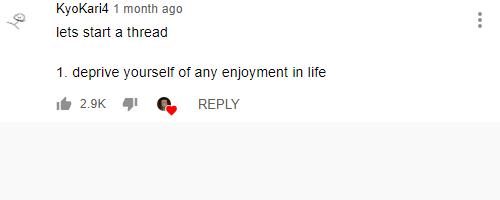

In [17]:
display(Image(filename=os.path.join("out", "0.png")))